# Make global data available as pandas data frame

We use data from the files at https://github.com/CSSEGISandData/COVID-19/tree/master/csse_covid_19_data/csse_covid_19_time_series

Thank you @CSSEGISandData for providing the data!

In [1]:
%config InlineBackend.figure_formats = ['svg']
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
figsize = (8, 6)   # need bigger size otherwise xlabels are cut-off in svg files

In [2]:
import os
import pandas as pd
import seaborn as sb
sb.set_style('darkgrid')
import scipy
import numpy as np

base_url = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/"

def string_to_date(input_):
    """Converts string of type 01/22/02 [for 22 Jan 2020] into datetime object"""
    # return pd.to_datetime(input_, format='%m/%d/%y', errors='ignore')
    return pd.to_datetime(input_, format='%m/%d/%y')


def set_date_formatting(ax):
    ax.xaxis.set_major_locator(matplotlib.dates.DayLocator())
    ax.xaxis.set_major_formatter(matplotlib.dates.DateFormatter('%b %d'))
    ax.tick_params(axis='x', rotation=90)

# read data from web
#
def fetch_data(names = ['Confirmed', 'Deaths', 'Recovered']):
    """Return 4 data frames:
    [confirmed, deaths, recovered], location_info
    
    where confirmed, deaths and recovered are data frames with countries/regions in the rows, and 
    days in the columns
    
    and location_info provides additional information about the locations.
    
    We assume all three tables have the same entries"""
    location_info = pd.DataFrame()
    dfs = []
    for name in names:
        url = os.path.join(base_url, "time_series_19-covid-" + name + ".csv")
        df = pd.read_csv(url, index_col=1)

        location_info['Lat'] = df['Lat']
        location_info['Long'] = df['Long']
        location_info['Province/State'] = df['Province/State']
        location_info['location'] = df.index + "-" + df['Province/State']
        # df = df.drop(labels=["Lat", "Long", "Province/State"], axis=1)
        df = df.drop(labels=["Lat", "Long"], axis=1)
        
        # extract dates from strings
        dates = string_to_date(df.columns[1:])        
        # use those objects as new column labels
        df.columns = [df.columns[0]] + list(dates)
        print(f"{name:10}: last data point from {max(dates[1:])}")
        # dfs.append([df, location_info)
        dfs.append(df)

    return dfs



In [3]:
# (confirmed, deaths, recovered), location_infos = fetch_data()
confirmed, deaths, recovered = fetch_data()

Confirmed : last data point from 2020-03-09 00:00:00
Deaths    : last data point from 2020-03-09 00:00:00
Recovered : last data point from 2020-03-09 00:00:00


In [4]:
deaths.head()

,Province/State,2020-01-22 00:00:00,2020-01-23 00:00:00,2020-01-24 00:00:00,2020-01-25 00:00:00,2020-01-26 00:00:00,2020-01-27 00:00:00,2020-01-28 00:00:00,2020-01-29 00:00:00,2020-01-30 00:00:00,...,2020-02-29 00:00:00,2020-03-01 00:00:00,2020-03-02 00:00:00,2020-03-03 00:00:00,2020-03-04 00:00:00,2020-03-05 00:00:00,2020-03-06 00:00:00,2020-03-07 00:00:00,2020-03-08 00:00:00,2020-03-09 00:00:00
Country/Region,,,,,,,,,,,,,,,,,,,,,
Mainland China,Anhui,0,0,0,0,0,0,0,0,0,...,6,6,6,6,6,6,6,6,6,6
Mainland China,Beijing,0,0,0,0,0,1,1,1,1,...,8,8,8,8,8,8,8,8,8,8
Mainland China,Chongqing,0,0,0,0,0,0,0,0,0,...,6,6,6,6,6,6,6,6,6,6
Mainland China,Fujian,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
Mainland China,Gansu,0,0,0,0,0,0,0,0,0,...,2,2,2,2,2,2,2,2,2,2


In [5]:
deaths.describe()

,2020-01-22,2020-01-23,2020-01-24,2020-01-25,2020-01-26,2020-01-27,2020-01-28,2020-01-29,2020-01-30,2020-01-31,...,2020-02-29,2020-03-01,2020-03-02,2020-03-03,2020-03-04,2020-03-05,2020-03-06,2020-03-07,2020-03-08,2020-03-09
count,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,...,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000
mean,0.063910,0.067669,0.097744,0.157895,0.210526,0.308271,0.492481,0.500000,0.642857,0.800752,...,11.056391,11.263158,11.597744,11.879699,12.233083,12.586466,13.007519,13.375940,14.296992,15.022556
std,1.042337,1.043908,1.473615,2.453621,3.189730,4.660845,7.664297,7.664793,9.933187,12.507875,...,167.196598,169.291883,171.892880,173.898519,176.177136,178.201693,180.178884,182.093822,184.677542,186.974682
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,17.000000,17.000000,24.000000,40.000000,52.000000,76.000000,125.000000,125.000000,162.000000,204.000000,...,2727.000000,2761.000000,2803.000000,2835.000000,2871.000000,2902.000000,2931.000000,2959.000000,2986.000000,3008.000000


Available countries:

In [6]:
pd.set_option('display.max_rows', None)

In [7]:
deaths

,Province/State,2020-01-22 00:00:00,2020-01-23 00:00:00,2020-01-24 00:00:00,2020-01-25 00:00:00,2020-01-26 00:00:00,2020-01-27 00:00:00,2020-01-28 00:00:00,2020-01-29 00:00:00,2020-01-30 00:00:00,...,2020-02-29 00:00:00,2020-03-01 00:00:00,2020-03-02 00:00:00,2020-03-03 00:00:00,2020-03-04 00:00:00,2020-03-05 00:00:00,2020-03-06 00:00:00,2020-03-07 00:00:00,2020-03-08 00:00:00,2020-03-09 00:00:00
Country/Region,,,,,,,,,,,,,,,,,,,,,
Mainland China,Anhui,0,0,0,0,0,0,0,0,0,...,6,6,6,6,6,6,6,6,6,6
Mainland China,Beijing,0,0,0,0,0,1,1,1,1,...,8,8,8,8,8,8,8,8,8,8
Mainland China,Chongqing,0,0,0,0,0,0,0,0,0,...,6,6,6,6,6,6,6,6,6,6
Mainland China,Fujian,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
Mainland China,Gansu,0,0,0,0,0,0,0,0,0,...,2,2,2,2,2,2,2,2,2,2
Mainland China,Guangdong,0,0,0,0,0,0,0,0,0,...,7,7,7,7,7,7,7,7,7,8
Mainland China,Guangxi,0,0,0,0,0,0,0,0,0,...,2,2,2,2,2,2,2,2,2,2
Mainland China,Guizhou,0,0,0,0,0,0,0,0,0,...,2,2,2,2,2,2,2,2,2,2
Mainland China,Hainan,0,0,0,0,0,1,1,1,1,...,5,5,5,5,5,6,6,6,6,6


In [8]:
confirmed

,Province/State,2020-01-22 00:00:00,2020-01-23 00:00:00,2020-01-24 00:00:00,2020-01-25 00:00:00,2020-01-26 00:00:00,2020-01-27 00:00:00,2020-01-28 00:00:00,2020-01-29 00:00:00,2020-01-30 00:00:00,...,2020-02-29 00:00:00,2020-03-01 00:00:00,2020-03-02 00:00:00,2020-03-03 00:00:00,2020-03-04 00:00:00,2020-03-05 00:00:00,2020-03-06 00:00:00,2020-03-07 00:00:00,2020-03-08 00:00:00,2020-03-09 00:00:00
Country/Region,,,,,,,,,,,,,,,,,,,,,
Mainland China,Anhui,1,9,15,39,60,70,106,152,200,...,990,990,990,990,990,990,990,990,990,990
Mainland China,Beijing,14,22,36,41,68,80,91,111,114,...,411,413,414,414,418,418,422,426,428,428
Mainland China,Chongqing,6,9,27,57,75,110,132,147,182,...,576,576,576,576,576,576,576,576,576,576
Mainland China,Fujian,1,5,10,18,35,59,80,84,101,...,296,296,296,296,296,296,296,296,296,296
Mainland China,Gansu,0,2,2,4,7,14,19,24,26,...,91,91,91,91,91,102,119,120,124,124
Mainland China,Guangdong,26,32,53,78,111,151,207,277,354,...,1349,1349,1350,1350,1350,1351,1352,1352,1352,1352
Mainland China,Guangxi,2,5,23,23,36,46,51,58,78,...,252,252,252,252,252,252,252,252,252,252
Mainland China,Guizhou,1,3,3,4,5,7,9,9,12,...,146,146,146,146,146,146,146,146,146,146
Mainland China,Hainan,4,5,8,19,22,33,40,43,46,...,168,168,168,168,168,168,168,168,168,168


In [9]:
recovered

,Province/State,2020-01-22 00:00:00,2020-01-23 00:00:00,2020-01-24 00:00:00,2020-01-25 00:00:00,2020-01-26 00:00:00,2020-01-27 00:00:00,2020-01-28 00:00:00,2020-01-29 00:00:00,2020-01-30 00:00:00,...,2020-02-29 00:00:00,2020-03-01 00:00:00,2020-03-02 00:00:00,2020-03-03 00:00:00,2020-03-04 00:00:00,2020-03-05 00:00:00,2020-03-06 00:00:00,2020-03-07 00:00:00,2020-03-08 00:00:00,2020-03-09 00:00:00
Country/Region,,,,,,,,,,,,,,,,,,,,,
Mainland China,Anhui,0,0,0,0,0,0,0,2,2,...,868,873,917,936,956,970,979,979,984,984
Mainland China,Beijing,0,0,1,2,2,2,4,4,4,...,271,276,282,288,297,297,299,303,308,315
Mainland China,Chongqing,0,0,0,0,0,0,0,1,1,...,438,450,469,490,502,512,513,526,527,542
Mainland China,Fujian,0,0,0,0,0,0,0,0,0,...,243,247,255,260,270,277,284,295,295,295
Mainland China,Gansu,0,0,0,0,0,0,0,0,0,...,82,84,85,86,87,87,87,87,87,88
Mainland China,Guangdong,0,2,2,2,2,4,4,5,10,...,983,1016,1059,1101,1133,1181,1216,1237,1256,1260
Mainland China,Guangxi,0,0,0,0,0,0,2,2,2,...,176,181,192,202,210,214,217,218,223,230
Mainland China,Guizhou,0,0,0,0,0,0,0,1,1,...,112,112,114,114,114,114,114,115,117,123
Mainland China,Hainan,0,0,0,0,0,0,0,0,1,...,148,149,151,155,158,158,158,158,159,159


# Pick one country

In [10]:
country = "Germany"
# country = "San Marino"
# country = "UK"
# country = "Italy"

In [11]:
# create one DataFrame for country/region
c_df = pd.DataFrame()
c_df['confirmed'] = confirmed.loc[country].drop('Province/State')
c_df['recovered'] = recovered.loc[country].drop('Province/State')
c_df['deaths'] = deaths.loc[country].drop('Province/State')
# Compute those who are infected and have not recovered or died yet and call them 'active'
c_df['active'] = c_df['confirmed'] - c_df['recovered'] - c_df['deaths']
c_df.index = string_to_date(c_df.index)

In [12]:
c_df.country = country  # remember which country we work on, just in case
c_df.tail()

,confirmed,recovered,deaths,active
2020-03-05,482,16,0,466
2020-03-06,670,17,0,653
2020-03-07,799,18,0,781
2020-03-08,1040,18,0,1022
2020-03-09,1176,18,2,1156


In [13]:
## Only cases since 25 Feb, set all values to zero for that day
c2_df = c_df['2020-02-25':] - c_df.loc['2020-02-25']
c2_df

,confirmed,recovered,deaths,active
2020-02-25,0,0,0,0
2020-02-26,10,1,0,9
2020-02-27,29,2,0,27
2020-02-28,31,2,0,29
2020-02-29,62,2,0,60
2020-03-01,113,2,0,111
2020-03-02,142,2,0,140
2020-03-03,179,2,0,177
2020-03-04,245,2,0,243
2020-03-05,465,2,0,463


/Users/fangohr/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


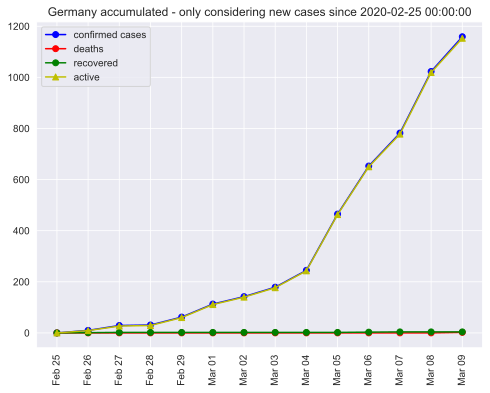

In [14]:
fig, ax = plt.subplots(figsize=figsize)
set_date_formatting(ax)
ax.plot(c2_df.index, c2_df['confirmed'], 'o-b')
ax.plot(c2_df.index, c2_df['deaths'], 'o-r')
ax.plot(c2_df.index, c2_df['recovered'], 'o-g')
ax.plot(c2_df.index, c2_df['active'], '^-y')
ax.legend(['confirmed cases', 'deaths', 'recovered', 'active'])
ax.set_title(country + " accumulated - only considering new cases since " + str(min(c2_df.index)));
fig.savefig("figures/germany-overview-25-feb.svg")

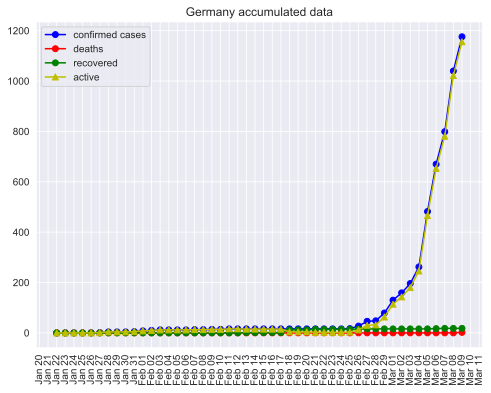

In [15]:
fig, ax = plt.subplots(figsize=figsize)
set_date_formatting(ax)
ax.plot(c_df.index, c_df['confirmed'], 'o-b')
ax.plot(c_df.index, c_df['deaths'], 'o-r')
ax.plot(c_df.index, c_df['recovered'], 'o-g')
ax.plot(c_df.index, c_df['active'], '^-y')
ax.legend(['confirmed cases', 'deaths', 'recovered', 'active'])
ax.set_title(country + " accumulated data")
fig.savefig("figures/germany-overview.svg")

# Compute some derived entities

In [16]:
# Compute day-to-day increases
c_df['new_confirmed'] = c_df['confirmed'].diff()
c_df['new_recovered'] = c_df['recovered'].diff()
c_df['new_deaths'] = c_df['deaths'].diff()
c_df['new_active'] = c_df['active'].diff()
c_df.tail()

,confirmed,recovered,deaths,active,new_confirmed,new_recovered,new_deaths,new_active
2020-03-05,482,16,0,466,220,0,0,220
2020-03-06,670,17,0,653,188,1,0,187
2020-03-07,799,18,0,781,129,1,0,128
2020-03-08,1040,18,0,1022,241,0,0,241
2020-03-09,1176,18,2,1156,136,0,2,134


In [17]:
c2_df['days-td'] = c2_df.index - c2_df.index.min()  # days as TimeDelta type
c2_df['days'] = c2_df['days-td'].astype("timedelta64[D]").astype(float)

In [18]:
c2_df

,confirmed,recovered,deaths,active,days-td,days
2020-02-25,0,0,0,0,0 days,0.0
2020-02-26,10,1,0,9,1 days,1.0
2020-02-27,29,2,0,27,2 days,2.0
2020-02-28,31,2,0,29,3 days,3.0
2020-02-29,62,2,0,60,4 days,4.0
2020-03-01,113,2,0,111,5 days,5.0
2020-03-02,142,2,0,140,6 days,6.0
2020-03-03,179,2,0,177,7 days,7.0
2020-03-04,245,2,0,243,8 days,8.0
2020-03-05,465,2,0,463,9 days,9.0


In [19]:
def model_par(t0=None, p=None, c=None, a0=None):
    """Just to order parameters into tuple for curve_fit call"""
    return t0, p, c, a0

def model(t, t0, p, c, a0):
    """Simple model"""
    
    return c*(t-t0)**p + a0 

def pretty_params(param, end="\n"):
    t0, p, c, a0 = param
    s = "p = {:.3f}".format(p) + end
    s += "c = {:.3g}".format(c) + end
    s += "t0= {:.3f}".format(t0) + end
    s += "a0= {:.3f}".format(a0)
    return s

def day_to_date(day, day0=pd.datetime(year=2020, month=1, day=21)):
    """Given the day from day0 (21 Jan 2020), return the data as a string.
    Example output: '26 Jan 2020'
    
    Needed to obtain days for predictions into the future, which are not given in our data frame 'data' yet.
    """
    assert isinstance(day, (int, float)), day
    
    # Compute date
    date = day0 + pd.Timedelta(day, "D")
    # format nicely
    s = date.strftime("%d %b %Y")
    return s

In [20]:
p0 = model_par(t0=0, p=5, c=5, a0=0)   # guess initial values for fit parameters
days = c2_df['days']
infections = c2_df['confirmed']
param_infections, cov_infections = \
    scipy.optimize.curve_fit(model, days, 
                             infections, 
                             p0=p0)  

In [21]:
t0, p, c, a0 = param_infections
fitted_infections = model(days, t0, p, c, a0)
print(pretty_params(param_infections))

p = 2.754
c = 1.03
t0= -0.000
a0= 5.903


In [22]:
# Estimated standard deviation of parameters
print("Uncertainties for fit parameters:")
with np.printoptions(precision=2, suppress=True):
    print(pretty_params(np.sqrt(cov_infections.diagonal())))

Uncertainties for fit parameters:
p = 1.456
c = 5.02
t0= 5.385
a0= 31.303


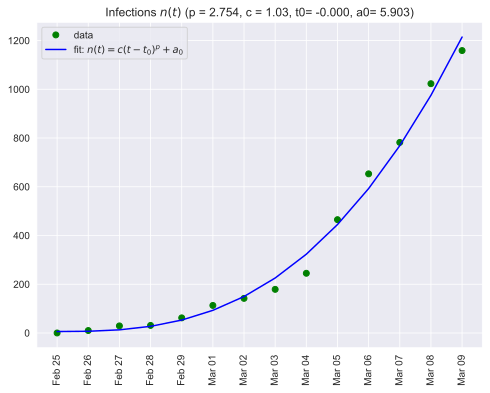

In [23]:
c2_df['date'] = c2_df.index
fig, ax = plt.subplots(figsize=figsize)
ax.plot(c2_df['date'], c2_df['confirmed'], 'og')
ax.plot(c2_df['date'], fitted_infections, '-b')
ax.legend(["data", "fit: $n(t) = c(t-t_0)^p+a_0$"])
ax.set_title(f"Infections $n(t)$ ({pretty_params(param_infections, end=', ')})")
ax.xaxis.set_major_locator(matplotlib.dates.DayLocator())
ax.xaxis.set_major_formatter(matplotlib.dates.DateFormatter('%b %d'))
ax.tick_params(axis='x', rotation=90)
fig.savefig('figures/infections-with-model-fit.svg')

In [24]:
predictions = pd.DataFrame(columns=['predicted', 'days-ahead', 'prediction-date'])


In [25]:
predictions.loc['31 Jan 2020'] = [100, 10, '31 Jan 2020']

In [26]:
predictions.index

Index(['31 Jan 2020'], dtype='object')

In [27]:
max(c2_df.index)

Timestamp('2020-03-09 00:00:00')

# Predictions for confirmed cases

In [69]:
with open("figures/germany-predicted-infections.txt", "tw") as f:
    f.write(f"Predictions for cases in {c_df.country}:\n\n")
    f.write(f"Last data point used in prediction from {max(c2_df.index)}\n\n")
    for future_days in range(1, 30):
        d = int(max(c2_df['days'])) + future_days
        f.write(f"Infections in {future_days:2} days: " +
              f"{int(round(model(d, c=c, t0=t0, p=p, a0=a0))):6}" +
              f" ({day_to_date(d, min(c2_df.index))})\n")
        
        
        
    f.write(f"\nFit parameters: {pretty_params(param_infections, end=' ')}")
!cat figures/germany-predicted-infections.txt

Predictions for cases in Germany:

Last data point used in prediction from 2020-03-09 00:00:00

Infections in  1 days:   1488 (10 Mar 2020)
Infections in  2 days:   1798 (11 Mar 2020)
Infections in  3 days:   2147 (12 Mar 2020)
Infections in  4 days:   2536 (13 Mar 2020)
Infections in  5 days:   2967 (14 Mar 2020)
Infections in  6 days:   3442 (15 Mar 2020)
Infections in  7 days:   3964 (16 Mar 2020)
Infections in  8 days:   4533 (17 Mar 2020)
Infections in  9 days:   5152 (18 Mar 2020)
Infections in 10 days:   5822 (19 Mar 2020)
Infections in 11 days:   6545 (20 Mar 2020)
Infections in 12 days:   7323 (21 Mar 2020)
Infections in 13 days:   8157 (22 Mar 2020)
Infections in 14 days:   9050 (23 Mar 2020)
Infections in 15 days:  10003 (24 Mar 2020)
Infections in 16 days:  11017 (25 Mar 2020)
Infections in 17 days:  12095 (26 Mar 2020)
Infections in 18 days:  13237 (27 Mar 2020)
Infections in 19 days:  14446 (28 Mar 2020)
Infections in 20 days:  15723 (29 Mar 2020)
Infections in 21 days:  

In [75]:
def insert(what, towhere, tag):
    # backup original
    cmd = f"cp -vf {towhere} tmp-backup.txt"
    print(f"cmd = {cmd}")
    os.system(cmd)
    with open(what, "tw") as f_out:
        with open("tmp-backup.txt", "tr") as f_in:
            for line in f_in:
                f_out.write(line)
                if tag in line:
                    print("Found tag")
                    with open(what, "rt") as f_table:
                        for line2 in f_table:
                            print("written ", line2)
                            f_out.write(line2)
                    # end towhere file here
                    break
                else:
                    pass
                    



insert("figures/germany-predicted-infections.txt", "README.md", tag="[comment] insert table here")

cmd = cp -vf README.md tmp-backup.txt
Found tag


 #predictions.loc[day_to_date(d)] = [future_days, pred, today, future_days]

## How long does it take for the number of infections to double?

- in the news, we had 6.4 days (with the recent [Lancet paper](https://www.thelancet.com/journals/lancet/article/PIIS0140-6736(20)30260-9/fulltext) given as the reference)

- based on $n(t') =  2n(t)$, we find $$t' = \left((2(t-t_0)^p+\frac{a_0}{c}\right)^\frac{1}{p} + t_0$$

- the time for infections or deaths to double is thus given by $t' - t$, and we can implement the above equation:

In [29]:
# def time_to_double(t, t0, p, a0, c):
def time_to_double(t, c, t0, p, a0):
    tprime = (2*(t - t0)**p + a0/c)**(1/p) + t0
    return tprime - t

In [30]:
day = max(c2_df['days'])
for d in range(0, 30, 2):
    print(f"at day {d:.0f} ({day_to_date(d, min(c2_df.index))}), the time to double n is {time_to_double(d, c, t0, p, a0):.1f} days")

at day 0 (25 Feb 2020), the time to double n is 1.9 days
at day 2 (27 Feb 2020), the time to double n is 0.9 days
at day 4 (29 Feb 2020), the time to double n is 1.3 days
at day 6 (02 Mar 2020), the time to double n is 1.8 days
at day 8 (04 Mar 2020), the time to double n is 2.3 days
at day 10 (06 Mar 2020), the time to double n is 2.9 days
at day 12 (08 Mar 2020), the time to double n is 3.5 days
at day 14 (10 Mar 2020), the time to double n is 4.0 days
at day 16 (12 Mar 2020), the time to double n is 4.6 days
at day 18 (14 Mar 2020), the time to double n is 5.2 days
at day 20 (16 Mar 2020), the time to double n is 5.7 days
at day 22 (18 Mar 2020), the time to double n is 6.3 days
at day 24 (20 Mar 2020), the time to double n is 6.9 days
at day 26 (22 Mar 2020), the time to double n is 7.4 days
at day 28 (24 Mar 2020), the time to double n is 8.0 days


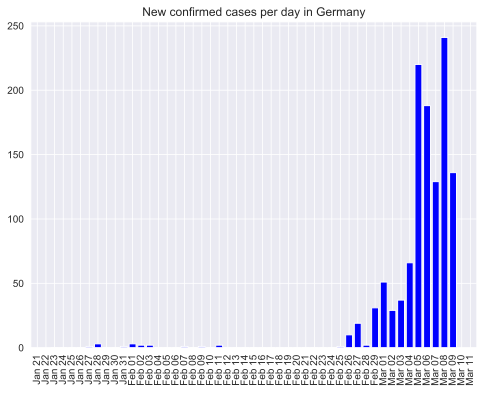

In [31]:
fig, ax = plt.subplots(figsize=figsize)
ax.bar(c_df.index, c_df['new_confirmed'], color='b')
set_date_formatting(ax)
ax.set_title(f"New confirmed cases per day in {c_df.country}")
fig.savefig(f'figures/new-cases-{c_df.country}.svg')

In [32]:
day

13.0

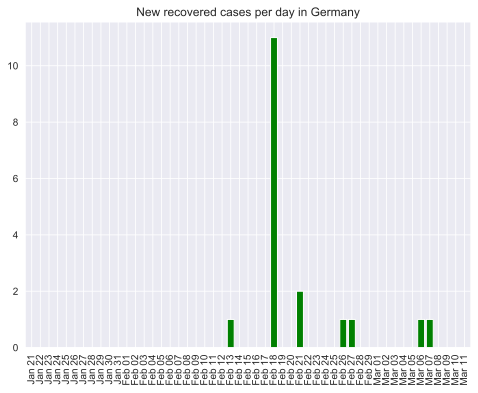

In [33]:
fig, ax = plt.subplots(figsize=figsize)
ax.bar(c_df.index, c_df['new_recovered'], color='g')
set_date_formatting(ax)
ax.set_title(f"New recovered cases per day in {c_df.country}")
fig.savefig(f'figures/new-recovered-{c_df.country}.svg')

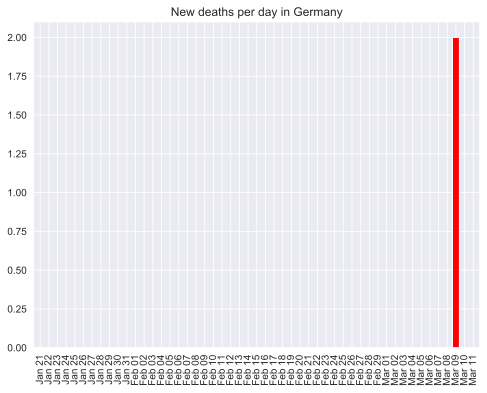

In [34]:
fig, ax = plt.subplots(figsize=figsize)
ax.bar(c_df.index, c_df['new_deaths'], color='r')
set_date_formatting(ax)
ax.set_title(f"New deaths per day in {c_df.country}")
fig.savefig(f'figures/new-deaths-{c_df.country}.svg')

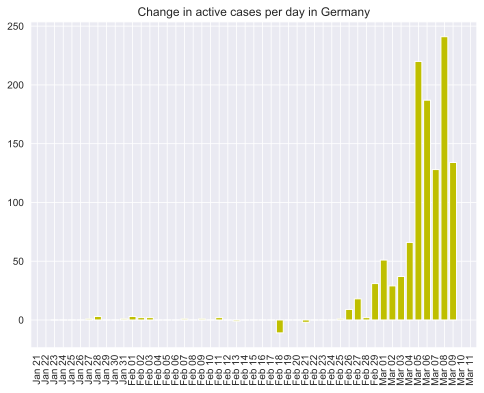

In [35]:
fig, ax = plt.subplots(figsize=figsize)
ax.bar(c_df.index, c_df['new_active'], color='y')
set_date_formatting(ax)
ax.set_title(f"Change in active cases per day in {c_df.country}")
fig.savefig(f'figures/new-active-{c_df.country}.svg')

# Look at some world wide data

In [36]:
# global data
glob = pd.DataFrame()
glob['deaths'] = deaths.sum(axis=0)
glob['confirmed'] = confirmed.sum(axis=0)
glob['recovered'] = recovered.sum(axis=0)
glob['active'] = glob['confirmed'] - glob['deaths'] - glob['recovered']
glob.index = string_to_date(glob.index)

In [37]:
pd.set_option('display.max_columns', 200)
glob

,deaths,confirmed,recovered,active
2020-01-22,17,555,28,510
2020-01-23,18,653,30,605
2020-01-24,26,941,36,879
2020-01-25,42,1434,39,1353
2020-01-26,56,2118,52,2010
2020-01-27,82,2927,61,2784
2020-01-28,131,5578,107,5340
2020-01-29,133,6166,126,5907
2020-01-30,171,8234,143,7920
2020-01-31,213,9927,222,9492


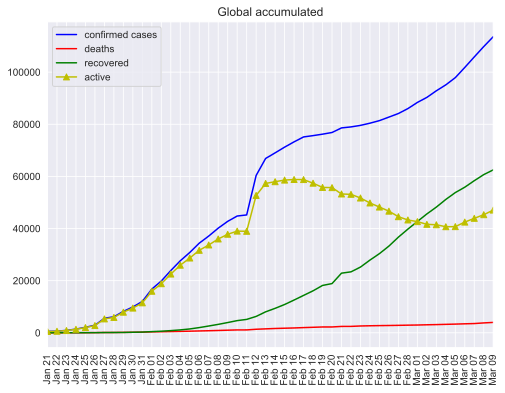

In [38]:
fig, ax = plt.subplots(figsize=figsize)
glob['confirmed'].plot(kind='line', style='-b', ax=ax)
glob['deaths'].plot(kind='line', style='-r', ax=ax)
glob['recovered'].plot(kind='line', style='-g', ax=ax)
glob['active'].plot(kind='line', style='^-y', ax=ax)
set_date_formatting(ax)
ax.legend(['confirmed cases', 'deaths', 'recovered', 'active'])
ax.set_title("Global accumulated");
fig.savefig('figures/global-overview.svg')

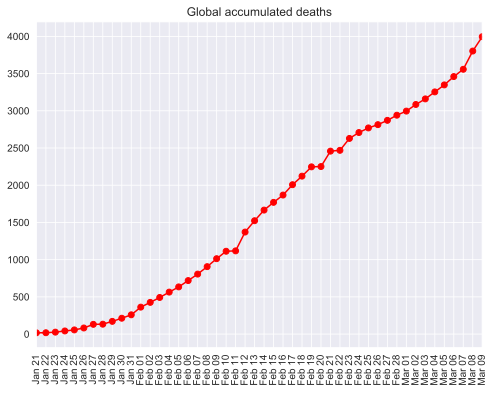

In [39]:
fig, ax = plt.subplots(figsize=figsize)
glob['deaths'].plot(kind='line', style='o-r', ax=ax)
set_date_formatting(ax)
ax.set_title("Global accumulated deaths");
fig.savefig("figures/global-deaths.svg")

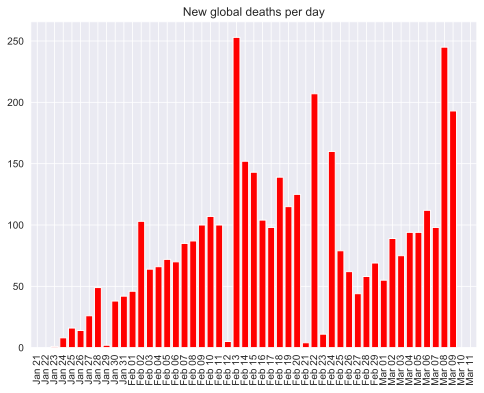

In [40]:
glob['new-deaths'] = glob['deaths'].diff()
glob['new-confirmed'] = glob['confirmed'].diff()

fig, ax = plt.subplots(figsize=figsize)
ax.bar(glob.index, glob['new-deaths'], color='r' )
set_date_formatting(ax)
ax.set_title("New global deaths per day")
fig.savefig('figures/global-new-deaths.svg');

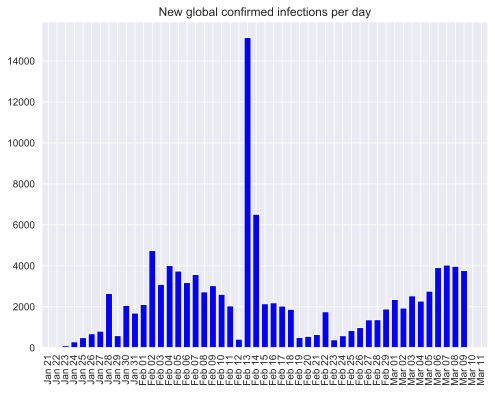

In [41]:
fig, ax = plt.subplots(figsize=figsize)
ax.bar(glob.index, glob['new-confirmed'], color='b')
set_date_formatting(ax)
ax.set_title("New global confirmed infections per day");
fig.savefig('figures/global-new-infections.svg');

# Any common behaviour in growth of infections?

In [42]:
# reduce to only countries with more than ncase cases
ncase = 1000
c3 = confirmed[confirmed.sum(axis=1) > ncase]
c3 = c3.drop('Province/State', axis=1)
print(f"Found {len(c3)} data sets with more than {ncase} infections")

Found 45 data sets with more than 1000 infections


In [43]:

norm = c3.sum(axis=1)

In [44]:
c4 = c3.div(norm, axis='index')
c4 = c3

In [45]:
c4.sum(axis=1)
mainland_china = c4.loc['Mainland China'].sum()
c5 = c4.drop('Mainland China')  # remove the long list of regions in China
# but add summary for China (sum over all regions, then normalised)
#c5.loc['Mainland China (sum)'] = mainland_china/mainland_china.sum()
c5.loc['Mainland China (sum)'] = mainland_china

print(f"{len(c5)} data sets remaining after removing regions in China")

17 data sets remaining after removing regions in China


/Users/fangohr/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [46]:
c5

,2020-01-22 00:00:00,2020-01-23 00:00:00,2020-01-24 00:00:00,2020-01-25 00:00:00,2020-01-26 00:00:00,2020-01-27 00:00:00,2020-01-28 00:00:00,2020-01-29 00:00:00,2020-01-30 00:00:00,2020-01-31 00:00:00,2020-02-01 00:00:00,2020-02-02 00:00:00,2020-02-03 00:00:00,2020-02-04 00:00:00,2020-02-05 00:00:00,2020-02-06 00:00:00,2020-02-07 00:00:00,2020-02-08 00:00:00,2020-02-09 00:00:00,2020-02-10 00:00:00,2020-02-11 00:00:00,2020-02-12 00:00:00,2020-02-13 00:00:00,2020-02-14 00:00:00,2020-02-15 00:00:00,2020-02-16 00:00:00,2020-02-17 00:00:00,2020-02-18 00:00:00,2020-02-19 00:00:00,2020-02-20 00:00:00,2020-02-21 00:00:00,2020-02-22 00:00:00,2020-02-23 00:00:00,2020-02-24 00:00:00,2020-02-25 00:00:00,2020-02-26 00:00:00,2020-02-27 00:00:00,2020-02-28 00:00:00,2020-02-29 00:00:00,2020-03-01 00:00:00,2020-03-02 00:00:00,2020-03-03 00:00:00,2020-03-04 00:00:00,2020-03-05 00:00:00,2020-03-06 00:00:00,2020-03-07 00:00:00,2020-03-08 00:00:00,2020-03-09 00:00:00
Country/Region,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Thailand,2,3,5,7,8,8,14,14,14,19,19,19,19,25,25,25,25,32,32,32,33,33,33,33,33,34,35,35,35,35,35,35,35,35,37,40,40,41,42,42,43,43,43,47,48,50,50,50
Japan,2,1,2,2,4,4,7,7,11,15,20,20,20,22,22,45,25,25,26,26,26,28,28,29,43,59,66,74,84,94,105,122,147,159,170,189,214,228,241,256,274,293,331,360,420,461,502,511
South Korea,1,1,2,2,3,4,4,4,4,11,12,15,15,16,19,23,24,24,25,27,28,28,28,28,28,29,30,31,31,104,204,433,602,833,977,1261,1766,2337,3150,3736,4335,5186,5621,6088,6593,7041,7314,7478
Taiwan,1,1,3,3,4,5,8,8,9,10,10,10,10,11,11,16,16,17,18,18,18,18,18,18,18,20,22,22,23,24,26,26,28,30,31,32,32,34,39,40,41,42,42,44,45,45,45,45
Hong Kong,0,2,2,5,8,8,8,10,10,12,13,15,15,17,21,24,25,26,29,38,49,50,53,56,56,57,60,62,63,68,68,69,74,79,84,91,92,94,95,96,100,100,105,105,107,108,114,115
Singapore,0,1,3,3,4,5,7,7,10,13,16,18,18,24,28,28,30,33,40,45,47,50,58,67,72,75,77,81,84,84,85,85,89,89,91,93,93,93,102,106,108,110,110,117,130,138,150,150
France,0,0,2,3,3,3,4,5,5,5,6,6,6,6,6,6,6,11,11,11,11,11,11,11,12,12,12,12,12,12,12,12,12,12,14,18,38,57,100,130,191,204,285,377,653,949,1126,1209
Malaysia,0,0,0,3,4,4,4,7,8,8,8,8,8,10,12,12,12,16,16,18,18,18,19,19,22,22,22,22,22,22,22,22,22,22,22,22,23,23,25,29,29,36,50,50,83,93,99,117
Germany,0,0,0,0,0,1,4,4,4,5,8,10,12,12,12,12,13,13,14,14,16,16,16,16,16,16,16,16,16,16,16,16,16,16,17,27,46,48,79,130,159,196,262,482,670,799,1040,1176


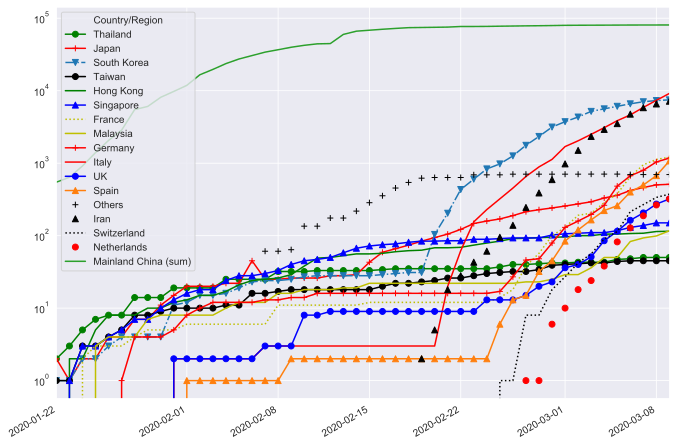

In [47]:
fig, ax = plt.subplots(figsize=(11,8))
styles = ['-og', '+-r', 'v-.', '-ok', '-g', 'b-^', ':y', '-y', '-r+', 'r-', '-bo', '^-', 'k+', 'k^', 'k:', 'ro']
c5.T.plot(ax=ax, style=styles)
ax.set_yscale('log')

Hm, not very conclusive.

# Some countries in Europe


In [48]:
countries = ['Italy', 'France', 'Spain', 'Germany', 'Finland', 'UK', 'Sweden', 'Belgium', 'Croatia', 'Norway', 'Netherlands', 'Iceland']
styles = ['-og', '+-r', 'v-.', '-ok', '-g', 'b-^', ':y', '-y', '-r+', 'g-', '-bo', '^-']
eu_deaths = deaths.loc[countries].T
eu_deaths.drop('Province/State', inplace=True)
eu_cases = confirmed.loc[countries].T
eu_cases.drop('Province/State', inplace=True)

In [49]:
eu_deaths.tail()

Country/Region,Italy,France,Spain,Germany,Finland,UK,Sweden,Belgium,Croatia,Norway,Netherlands,Iceland
2020-03-05 00:00:00,148,6,3,0,0,1,0,0,0,0,0,0
2020-03-06 00:00:00,197,9,5,0,0,2,0,0,0,0,1,0
2020-03-07 00:00:00,233,11,10,0,0,2,0,0,0,0,1,0
2020-03-08 00:00:00,366,19,17,0,0,3,0,0,0,0,3,0
2020-03-09 00:00:00,463,19,28,2,0,4,0,0,0,0,3,0


Text(0.5, 1.0, 'Deaths in some European countries (log scale)')

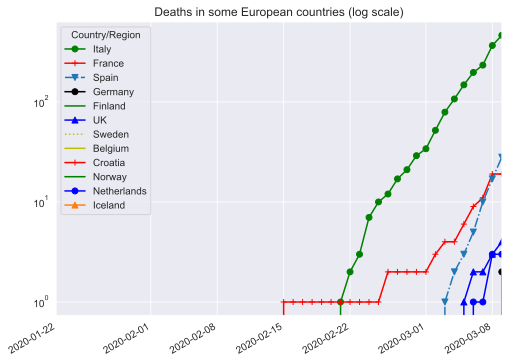

In [50]:
fig, ax = plt.subplots(figsize=figsize)
eu_deaths.plot(kind='line', ax=ax, style=styles)
ax.set_yscale('log')
ax.set_title("Deaths in some European countries (log scale)")

In [51]:
eu_cases.tail()

Country/Region,Italy,France,Spain,Germany,Finland,UK,Sweden,Belgium,Croatia,Norway,Netherlands,Iceland
2020-03-05 00:00:00,3858,377,259,482,12,115,94,50,10,87,82,34
2020-03-06 00:00:00,4636,653,400,670,15,163,101,109,11,108,128,43
2020-03-07 00:00:00,5883,949,500,799,15,206,161,169,12,147,188,50
2020-03-08 00:00:00,7375,1126,673,1040,23,273,203,200,12,176,265,50
2020-03-09 00:00:00,9172,1209,1073,1176,30,321,248,239,12,205,321,58


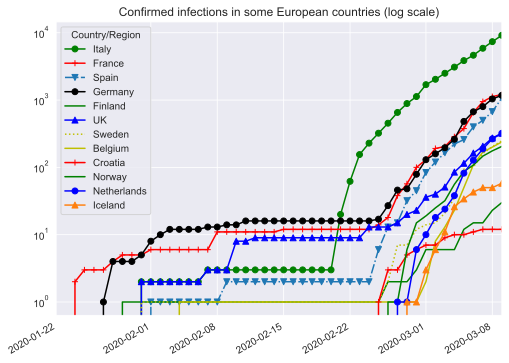

In [52]:
fig, ax = plt.subplots(figsize=figsize)

eu_cases.plot(kind='line', ax=ax, style=styles)
ax.set_yscale('log')
ax.set_title("Confirmed infections in some European countries (log scale)");

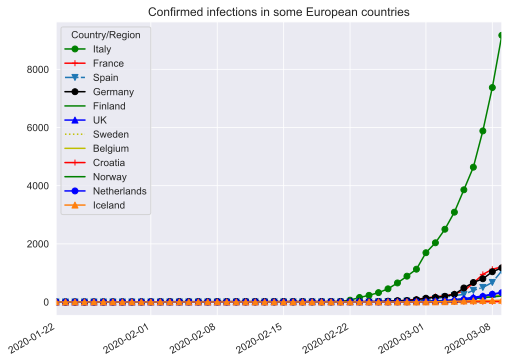

In [53]:
fig, ax = plt.subplots(figsize=figsize)
eu_cases.plot(kind='line', ax=ax, style=styles)
ax.set_title("Confirmed infections in some European countries");